(pandas1)=
# Tables (`pandas`)

In [116]:
!echo Last updated: `date +"%Y-%m-%d %H:%M:%S"`

Last updated: 2023-10-02 15:26:38


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 35
plt.rcParams["figure.figsize"] = (6, 6)

*****

## Introduction

Tables are a fundamental data structure, common to many software interfaces, such as spreadsheet programs, relational databases, statistical software, etc. In general, a table is a two-dimensional structure where:

* Columns represent *variables*
* Rows represent *observations*

Accordingly, the data in a given table column is usually of the same data type. For example, a text column may be used to store product names, and a numeric column may be used for storing product prices. Conversely, the data in a given row may comprise mixed types, such as the product name (text) and the price (numeric) of a particular product.

In this chapter we introduce methods for working with *tables* in Python, through a popular third-party package named `pandas`, introducing two table-related data structures, `Series` and `DataFrame`. As we will see, the latter data structures are closely related to `numpy`, which was covered in the previous chapter (see {ref}`numpy`), since the data in each table column is actually stored as an "extended" one-dimensional `numpy` array. We are going to cover standard table-related operations, such as:

* Creating tables (see {ref}`pandas-creating-from-scratch` and {ref}`pandas-reading-from-file`)
* Examining table properties (see {ref}`dataframe-properties`)
* Modifying tables (see {ref}`pandas-renaming-columns`, {ref}`modifying-index`, {ref}`pandas-sorting`, {ref}`pandas-operators`, and {ref}`pandas-creating-new-columns`)
* Subsetting tables (see {ref}`subsetting-series`, {ref}`subsetting-dataframes`, and {ref}`dataframe-filtering`)
* {ref}`pandas-missing-data`
* Conversion to simpler data structures (see {ref}`dataframe-to-array` and {ref}`pandas-to-list`)
* Plotting table data (see {ref}`pandas-plotting`)
* Exporting a table to file (see {ref}`pandas-writing`)

In the next chapter, we are going to discuss more advanced operations with tables, such as table aggregation and table joins (see {ref}`pandas2`). Later on, we are going to learn about the `geopandas` package for working with vector layers, which is an extension of `pandas` (see {ref}`geopandas1` and {ref}`geopandas2`).

## What is `pandas`?

`pandas` is a popular Python package which provides a flexible set of tools for working with tabular data. Since tables are fundamental in data analysis, `pandas` is one of the most important packages for data analysis in Python. Moreover, as we will see later on in the book (see {ref}`geopandas1`), a vector layers is represented by an "extended" table—a table that has a "geometry" column. Accordingly, the package for working with vector later, named `geopandas`, is an extension of `pandas`.

The `pandas` package defines two fundamental data structures:

* `Series`—A one-dimensional structure, representing a table *column*
* `DataFrame`—A two-dimensional structure, represent a *table*

As we will see shortly, `pandas` is essentially an extension of `numpy`. A `pandas` table (a data structure named `DataFrame`) is a collection of `Series` representing the table columns, whereas `Series` are actually nothing more than labelled `numpy` arrays. To repeat, these two data structures therefore form a hierarchy: each column in a `DataFrame` is a `Series`.

```{note}
For those familiar with the R programming language, the term `DataFrame` will sound familiar, resembling R's own data structure for representing tables (the `data.frame`). Indeed, `pandas` borrowed many ideas from the R language. A pairwise comparison of `pandas` vs. R functionality can be found in the `pandas` documentation: <https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html>
```

(pandas-creating-from-scratch)=
## Table from scratch

(creating-series)=
### Creating a `Series`

To understand how a `DataFrame` is structured, we will experiment with creating one from scratch. First we need to load the `pandas` package, as well as `numpy` which we use in some of the examples:

In [118]:
import numpy as np
import pandas as pd

A `Series` can be created, from a `list`, or from an `ndarray`, using `pd.Series`. For example, the following expression creates a `Series` from a `list` containing three strings, the names of three railway stations in southern Israel:

In [119]:
name = pd.Series(['Beer-Sheva Center', 'Beer-Sheva University', 'Dimona'])
name

0        Beer-Sheva Center
1    Beer-Sheva University
2                   Dimona
dtype: object

```{note}
In `pandas`, strings are always stored as `'object'` arrays (`Series`), unlike `numpy` which has specialized native data types for strings.
```

The following expression creates another `Series`, named `lines`, containing the number of railway lines going through the latter stations. This time, we create the `Series` from an `ndarray`:

In [120]:
lines = pd.Series(np.array([4, 5, 1]))
lines

0    4
1    5
2    1
dtype: int64

A `Series` object is essentially a `numpy` array, combined with *indices*. Here is how we can access each of these components, separately:

In [121]:
lines.to_numpy()  ## Series values, as 'ndarray'

array([4, 5, 1])

In [122]:
lines.index       ## Series index

RangeIndex(start=0, stop=3, step=1)

As you can see, `Series` *values* comprise a `numpy` array, which we are already familiar with. `Series` *indices*, however, comprise a special type of object used for indexing in `pandas`:

In [123]:
type(name.index)

pandas.core.indexes.range.RangeIndex

By default, the index is just a sequence of consecutive integers (such as in `names` and `lines`). When necessary, we can define any other sequence of values as a `Series` index (see {ref}`modifying-index`), then use it to access specific values (see {ref}`subsetting-series`).

Index objects are similar to arrays in many ways. For example, they have `.shape` and `.dtype` attributes, just like arrays do:

In [124]:
lines.index.shape

(3,)

In [125]:
lines.index.dtype

dtype('int64')

(creating-dataframe)=
### Creating a `DataFrame`

While a `Series` can be thought of as an extended one-dimensional array, a `DataFrame` can be thought of as a collection of `Series` comprising table columns. Unlike a two-dimensional `numpy` array, a `DataFrame` can be composed of different types of values (among the columns). Consequently: 

* a `DataFrame` *column* (i.e., a `Series`) contains values of the *same* type, usually representing a particular variable
* a `DataFrame` *row* may contain values of *different* types, usually representing a specific observation

Since a `DataFrame` is two-dimensional, it has two sets of idices, row and column indices, just like a two-dimensional array. It is important to note that all `Series` that comprise the columns of a `DataFrame` share the same index.

A `DataFrame` can be created from scratch, using the `pd.DataFrame` function. To do that, let us create four more `Series` which are going to comprise the `DataFrame` columns. Altogether, the `DataFrame` is going to represent various properties of three railway stations:

In [126]:
city = pd.Series(['Beer-Sheva', 'Beer-Sheva', 'Dimona'])
piano = pd.Series([False, True, False])
lon = pd.Series([34.798443, 34.812831, 35.011635])
lat = pd.Series([31.243288, 31.260284, 31.068616])

Here is a printout of the four `Series` we just created:

In [127]:
city

0    Beer-Sheva
1    Beer-Sheva
2        Dimona
dtype: object

In [128]:
piano

0    False
1     True
2    False
dtype: bool

In [129]:
lon

0    34.798443
1    34.812831
2    35.011635
dtype: float64

In [130]:
lat

0    31.243288
1    31.260284
2    31.068616
dtype: float64

Now, the six different `Series` can be combined into a `DataFrame` by passing them, as a `dict` (see {ref}`dict`), to the `pd.DataFrame` function. That way, the `dict` names will form the `DataFrame` column names, while the corresponding `Series` will form the column contents:

In [131]:
d = {'name': name, 'city': city, 'lines': lines, 'piano': piano, 'lon': lon, 'lat': lat}
stations = pd.DataFrame(d)
stations

,name,city,lines,piano,lon,lat
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284
2,Dimona,Dimona,1,False,35.011635,31.068616


```{note}
Note that there are other methods to create a `DataFrame`, passing different types of input to the `pd.DataFrame` function. For example, another useful method of creating a `DataFrame` by passing a two-dimensional array to `pd.DataFrame`.
```

`DataFrame` row indices are analogous to `Series` indices, and accessed exactly the same way:

In [132]:
stations.index

RangeIndex(start=0, stop=3, step=1)

Additionally, a `DataFrame` has *column* indices, which function as column names and can be accessed through the `.columns` property:

In [133]:
stations.columns

Index(['name', 'city', 'lines', 'piano', 'lon', 'lat'], dtype='object')

(pandas-reading-from-file)=
## Reading from file

In practice, we rarely need to create a `DataFrame` from scratch. More often, we read a table in an existing file containing tabular data, such as a CSV file.

The `pd.read_csv` function is used to read a CSV file into a `DataFrame` in our Python environment. For example, the following expression reads the CSV file named `ZonAnn.Ts+dSST.csv`, which contains global temperature data from [GISS](https://data.giss.nasa.gov/gistemp/). The values are anomalies, i.e. deviations from the corresponding 1951-1980 mean, for the period 1880-2021 (`'Year'`), both globally (`'Glob'`) and for specific latitudes (`'NHem'`=Nothern Hemishpere, `'24N-90N'` latitudes 24-90, etc.):

In [134]:
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')
dat

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67
1,1881,-0.09,-0.19,0.01,-0.37,...,0.10,0.12,-0.04,-0.07,0.59
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.05,-0.04,0.02,0.04,0.62
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.17,-0.14,-0.03,0.07,0.50
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.12,-0.16,-0.18,-0.02,0.65
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
141,2021,0.85,1.14,0.56,1.42,...,0.72,0.59,0.72,0.32,0.31


```{note}
`pandas` has several functions named `pd.read_*` to read formats other than CSV, such as `pd.read_json`, `pd.read_excel`, `pd.read_spss`, `pd.read_stata`, and `pd.read_sql`. Similarly, there are several functions to write `DataFrame` objects to various output formats. See the [IO tools](https://pandas.pydata.org/docs/user_guide/io.html) section in the `pandas` user guide for an overview of the input/output capabilities.
```

Note that rows and columns are *labelled* using indices, as shown above. In this case: 

* Rows are labelled with consecutive integers
* Columns are labelled with column names, which are imported from the first line in CSV file

(dataframe-properties)=
## `DataFrame` properties

### Overview

One of the first things we may want to do with a `DataFrame` imported from a file is to examine its properties, as shown in the next few sections: 

* {ref}`dataframe-dimensions`
* {ref}`dataframe-column-names`
* {ref}`dataframe-column-types`

(dataframe-dimensions)=
### `DataFrame` dimensions

`DataFrame` dimensions are accessible through the `.shape` property, just like in a `numpy` array (see {ref}`array-dimensions`). For example, the `dat` table (with the temperature data) has 142 rows and 15 columns:

In [135]:
dat.shape

(143, 15)

(dataframe-column-names)=
### `DataFrame` column names

The `DataFrame` column names can be obtained through the `.columns` property. Recall that this is a special data structure representing `pandas` indices (see {ref}`pandas-creating-from-scratch`):

In [136]:
dat.columns

Index(['Year', 'Glob', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S',
       '64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S',
       '64S-44S', '90S-64S'],
      dtype='object')

```{admonition} Exercise 05-a
:class: important
* From your experience with Python so far, can you guess how can the columns names be transformed to a plain `list`? (You can also try searching for the answer online.)
```

(dataframe-column-types)=
### `DataFrame` column types

The data types (see {ref}`numpy-data-types`) of the columns are contained in the `dtypes` property:

In [137]:
dat.dtypes

Year         int64
Glob       float64
NHem       float64
SHem       float64
24N-90N    float64
            ...   
EQU-24N    float64
24S-EQU    float64
44S-24S    float64
64S-44S    float64
90S-64S    float64
Length: 15, dtype: object

Note that this is a `Series` (of `dtype` objects). This means we can get a specific value by index using the ordinary `Series` subsetting methods which we learn about later on (see {ref}`subsetting-series`). For example, the `"Year"` column was imported into a `Series` of type `int64`:

In [138]:
dat.dtypes.loc['Year']

dtype('int64')

while the `'Glob'` column (global temperature anomaly) was imported into a `float64` column:

In [139]:
dat.dtypes.loc['Glob']

dtype('float64')

The basic `pandas` data types are in agreement with `numpy` data types (see {ref}`numpy-data-types`). For example, the `dat` table contains `int64` and `float64` data types. However, `pandas` and its extensions (such as `geopandas`, see {ref}`what-is-geopandas`) also extend the `numpy` functionality with new data types (such as `GeometryDtype`, see {ref}`geoseries-geometry-column`).

(pandas-renaming-columns)=
## Renaming columns

Sometimes it is necessary to rename `DataFrame` columns. For example, we may wish to use shorter names which are easier to type, or make the columns match another table we are working with. Columns can be renamed using the `.rename` method, which accepts a `columns` argument of the form `{'old_name':'new_name',...}`. For example, here is how we can replace the `'Year'` column name with lowercase `'year'`:

In [140]:
dat.rename(columns={'Year': 'year'})

,year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67
1,1881,-0.09,-0.19,0.01,-0.37,...,0.10,0.12,-0.04,-0.07,0.59
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.05,-0.04,0.02,0.04,0.62
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.17,-0.14,-0.03,0.07,0.50
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.12,-0.16,-0.18,-0.02,0.65
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
141,2021,0.85,1.14,0.56,1.42,...,0.72,0.59,0.72,0.32,0.31


```{note}
Another option to rename columns is to assign a `list` of strings of the same length as the number of columns to the `.columns` attribute (see <https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas#answer-11346337>).
```

## Subsetting in `pandas`

(pandas-subsetting-overview)=
### Overview

There are numerous methods of subsetting `Series` and `DataFrame`s in `pandas`. For example, `Series` values can be subsetted using the `[` operator. However, this can be confusing since both using numeric indices and the index values are permitted, and it can be unclear which method is actually employed. 

In agreement with the Python philosophy, where *explicit* is better than implicit, the [recommended](https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc) subsetting methods are using `.loc` and `.iloc`, which are discussed in the following sub-sections. The principal difference between `.loc` and `.iloc` is:

* `.loc` uses `pandas` indices, while 
* `.iloc` uses (implicit) `numpy`-style numeric indices. 

In this book, we are going to use `.iloc` and `.loc` methods when subsetting `Series` (this section) and `DataFrame` (see {ref}`subsetting-dataframes`) objects. Nevertheless, for shorter syntax, we are going to use the `[` shortcut in the following cases: 

* Selecting `DataFrame` columns using the `[` operator, as in: 
    * `dat['Year']` instead of `dat.loc[:,'Year']` (see {ref}`dataframe-selecting-columns`)
    * `dat[['Year']]` instead of `dat.loc[:,['Year']]` (see {ref}`dataframe-selecting-columns`)
* Filtering `DataFrame` rows using the `[` operator, as in:
    * `dat[dat['Year']>2017]` instead of `dat.loc[dat['Year']>2017]` (see {ref}`dataframe-filtering`)

(subsetting-series)=
### Subsetting `Series`

As mentioned above, the recommended way to subset `Series` is using the specialized methods named `.loc` and `.iloc`:

* `.loc`—For subsetting using the `Series` index
* `.iloc`—For subsetting using the (implicit) `numpy` index

What follows after the method are the indices, inside square brackets (`[`), whereas the indices can be one of:

* An individual value, such as `.loc['a']` or `.iloc[0]`
* A slice, such as `.loc['a':'b']` or `.iloc[1:2]`
* A `list`, such as `.loc[['a','c']]` or `.iloc[[0,2]]`

For the next few examples, let us create a `Series` object named `s`, with:

* values `11`, `12`, `13`, `14`, and 
* indices `'a'`, `'b'`, `'c'`, `'d'`, 
 
using the `index` parameter of `pd.Series`:

In [141]:
s = pd.Series([11, 12, 13, 14], index=['a', 'b', 'c', 'd'])
s

a    11
b    12
c    13
d    14
dtype: int64

Here is how we can use `.loc` to select values using the three above-mentioned types of indices:

In [142]:
s.loc['a']         ## Individual index

11

In [143]:
s.loc['b':'c']     ## Slice

b    12
c    13
dtype: int64

In [144]:
s.loc[['a', 'c']]  ## 'list' of indices

a    11
c    13
dtype: int64

And here is how we can use `.iloc` to select values using `numpy`-style numeric indices:

In [145]:
s.iloc[0]       ## Individual index

11

In [146]:
s.iloc[1:2]     ## Slice

b    12
dtype: int64

In [147]:
s.iloc[[0, 2]]  ## 'list' of indices

a    11
c    13
dtype: int64

In the above examples, note how using an individual index returns a standalone value, while using a slice, or a list of indices, return a `Series`, even if the list or the slice contains just one element:

In [148]:
s.iloc[[0]]

a    11
dtype: int64

Also note that a slice using indices (such as `s.loc['a':'b']`) is *inclusive*, while a slice using implicit indices (such as `.iloc[0:1]`) excludes the last index similarly to `list` and `numpy` behavior.

(subsetting-dataframes)=
### Subsetting `DataFrame`s

(dataframe-selecting-columns)=
#### Selecting `DataFrame` columns

A `DataFrame` is a two-dimensional object, unlike a `Series` which is one-dimensional. Accordingly, the `.loc` and `iloc` methods of a `DataFrame` accept two indices, separated by a comma: 

* The *first* index refers to rows
* The *second* index refers to columns

When we want to select *all* rows or columns, we place `:` in the respective index, similarly to `numpy` array subsetting (see {ref}`subsetting-arrays`). Using an individual index returns a `Series`, while using a slice or a `list` of indices—even if length `1`—returns a `DataFrame`.

For example, this is how we can use `.loc` to extract one `DataFrame` column as a `Series`:

In [149]:
dat.loc[:, 'Glob']

0     -0.17
1     -0.09
2     -0.11
3     -0.17
4     -0.28
       ... 
138    0.85
139    0.98
140    1.02
141    0.85
142    0.89
Name: Glob, Length: 143, dtype: float64

and here is how we can extract a single column as a `DataFrame`:

In [150]:
dat.loc[:, ['Glob']]

,Glob
0,-0.17
1,-0.09
2,-0.11
3,-0.17
4,-0.28
...,...
138,0.85
139,0.98
140,1.02
141,0.85


As mentioned above (see {ref}`pandas-subsetting-overview`), we can also use the shortcut `[` operator to subset columns(s):

In [151]:
dat['Glob']  ## Shortcut for `dat.loc[:, 'Glob']`

0     -0.17
1     -0.09
2     -0.11
3     -0.17
4     -0.28
       ... 
138    0.85
139    0.98
140    1.02
141    0.85
142    0.89
Name: Glob, Length: 143, dtype: float64

In [152]:
dat[['Glob']]  ## Shortcut for `dat.loc[:, ['Glob']]`

,Glob
0,-0.17
1,-0.09
2,-0.11
3,-0.17
4,-0.28
...,...
138,0.85
139,0.98
140,1.02
141,0.85


```{note}
Dot notation, as in `dat.Glob` can also be used to select individual columns of a `DataFrame`. However, this is not recommended, because it does not work (1) with non-string column names, and (2) with column names that are the same as `DataFrame` methods, such as `.pop`.
```

We can pass a `list` of column names to select more then one column. For example:

In [153]:
dat[['Year', 'Glob', 'NHem', 'SHem']]

,Year,Glob,NHem,SHem
0,1880,-0.17,-0.30,-0.04
1,1881,-0.09,-0.19,0.01
2,1882,-0.11,-0.23,0.00
3,1883,-0.17,-0.29,-0.06
4,1884,-0.28,-0.44,-0.14
...,...,...,...,...
138,2018,0.85,1.03,0.66
139,2019,0.98,1.21,0.75
140,2020,1.02,1.35,0.68
141,2021,0.85,1.14,0.56


To select all columns *except* for the specified ones, we can use the `.drop` method combined with `axis=1`:

In [154]:
dat.drop(['Year', 'Glob', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S'], axis=1)

,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,-0.81,-0.50,-0.31,-0.15,-0.09,-0.03,0.05,0.67
1,-0.92,-0.47,-0.23,0.10,0.12,-0.04,-0.07,0.59
2,-1.42,-0.29,-0.18,-0.05,-0.04,0.02,0.04,0.62
3,-0.18,-0.57,-0.28,-0.17,-0.14,-0.03,0.07,0.50
4,-1.31,-0.65,-0.49,-0.12,-0.16,-0.18,-0.02,0.65
...,...,...,...,...,...,...,...,...
138,2.13,1.09,1.05,0.73,0.63,0.80,0.37,0.96
139,2.71,1.44,0.99,0.90,0.89,0.75,0.39,0.85
140,2.90,1.82,1.18,0.88,0.84,0.58,0.39,0.91
141,2.04,1.36,1.26,0.72,0.59,0.72,0.32,0.31


Another useful technique is to use `.loc` combined with *slices* of column names. For example, we can select all columns between two specified ones:

In [155]:
dat.loc[:, 'Year':'SHem']

,Year,Glob,NHem,SHem
0,1880,-0.17,-0.30,-0.04
1,1881,-0.09,-0.19,0.01
2,1882,-0.11,-0.23,0.00
3,1883,-0.17,-0.29,-0.06
4,1884,-0.28,-0.44,-0.14
...,...,...,...,...
138,2018,0.85,1.03,0.66
139,2019,0.98,1.21,0.75
140,2020,1.02,1.35,0.68
141,2021,0.85,1.14,0.56


or all columns *before* a specified one:

In [156]:
dat.loc[:, :'SHem']

,Year,Glob,NHem,SHem
0,1880,-0.17,-0.30,-0.04
1,1881,-0.09,-0.19,0.01
2,1882,-0.11,-0.23,0.00
3,1883,-0.17,-0.29,-0.06
4,1884,-0.28,-0.44,-0.14
...,...,...,...,...
138,2018,0.85,1.03,0.66
139,2019,0.98,1.21,0.75
140,2020,1.02,1.35,0.68
141,2021,0.85,1.14,0.56


or all columns *after* a specified one:

In [157]:
dat.loc[:, 'SHem':]

,SHem,24N-90N,24S-24N,90S-24S,64N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,-0.04,-0.39,-0.12,-0.01,-0.81,...,-0.15,-0.09,-0.03,0.05,0.67
1,0.01,-0.37,0.11,-0.06,-0.92,...,0.10,0.12,-0.04,-0.07,0.59
2,0.00,-0.33,-0.04,0.02,-1.42,...,-0.05,-0.04,0.02,0.04,0.62
3,-0.06,-0.36,-0.16,-0.01,-0.18,...,-0.17,-0.14,-0.03,0.07,0.50
4,-0.14,-0.62,-0.14,-0.13,-1.31,...,-0.12,-0.16,-0.18,-0.02,0.65
...,...,...,...,...,...,...,...,...,...,...,...
138,0.66,1.24,0.68,0.69,2.13,...,0.73,0.63,0.80,0.37,0.96
139,0.75,1.42,0.90,0.65,2.71,...,0.90,0.89,0.75,0.39,0.85
140,0.68,1.67,0.86,0.57,2.90,...,0.88,0.84,0.58,0.39,0.91
141,0.56,1.42,0.66,0.53,2.04,...,0.72,0.59,0.72,0.32,0.31


Again, note that in the last examples, the subset is *inclusive*, i.e., includes both the start and end columns.

```{admonition} Exercise 05-c
:class: important
* How can we select all columns after the specified one *excluding* itself?
```

(dataframe-selecting-rows)=
#### Selecting `DataFrame` rows

Rows can be selected using `.loc` or `.iloc`, similarly to the way we use those methods to select columns. The difference is that we specify the first index, instead of the second. For example:

In [158]:
dat.iloc[[0], :]     ## 1st row

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.3,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67


In [159]:
dat.iloc[0:3, :]     ## 1st row (inclusive) to 4th row (exclusive)

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67
1,1881,-0.09,-0.19,0.01,-0.37,...,0.10,0.12,-0.04,-0.07,0.59
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.05,-0.04,0.02,0.04,0.62


In [160]:
dat.iloc[[0, 2], :]  ## 1st and 3rd rows

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.05,-0.04,0.02,0.04,0.62


```{admonition} Exercise 05-b
:class: important
* Create a subset of `dat` with the 1<sup>st</sup>, 3<sup>rd</sup>, and 5<sup>th</sup> rows.
```

#### Selecting rows and columns

Both `DataFrame` dimensions can be subsetted at once, by passing two indices to `.loc` or to `.iloc`. For example, here we select a subset of `dat` with the first four rows and the first four columns (i.e., the top-left "corner" of the table), using `.iloc`:

In [161]:
dat.iloc[0:4, 0:4]

,Year,Glob,NHem,SHem
0,1880,-0.17,-0.30,-0.04
1,1881,-0.09,-0.19,0.01
2,1882,-0.11,-0.23,0.00
3,1883,-0.17,-0.29,-0.06


The same can be acheived using separate steps, for example using `.loc` to select columns, and then `.iloc` to select rows:

In [162]:
dat.loc[:, 'Year':'SHem'].iloc[0:4, :]

,Year,Glob,NHem,SHem
0,1880,-0.17,-0.30,-0.04
1,1881,-0.09,-0.19,0.01
2,1882,-0.11,-0.23,0.00
3,1883,-0.17,-0.29,-0.06


#### Selecting `DataFrame` values

Using the above-mentioned methods, we can access individual values from a `DataFrame` in several ways. The clearest syntax is probably splitting the operation into two parts: first selecting the *column*, then selecting the *index* within the column. For example, here is how we can get the first value in the `'Year'` column of `dat`:

In [163]:
dat['Year'].iloc[0]

1880

```{admonition} Exercise 05-d
:class: important
* How can we get the *last* value in the `'Year'` column of `dat`, without explicitly typing the value `141`?
```

(dataframe-to-array)=
## Convertsion to `ndarray`

A `Series` or a `DataFrame` is accessible as an `ndarray`, through the `.to_numpy` method. For example: 

In [164]:
dat['Year'].iloc[0:3].to_numpy()  ## 'Series' to array

array([1880, 1881, 1882])

In [165]:
dat.iloc[0:3, 1:3].to_numpy()     ## 'DataFrame' to array

array([[-0.17, -0.3 ],
       [-0.09, -0.19],
       [-0.11, -0.23]])

Note that a `Series` is translated to a *one*-dimensional array, while a `DataFrame` is translated to a *two*-dimensional array.

(pandas-to-list)=
## Conversion to `list`

(pandas-series-to-list)=
### `Series` to `list`

Sometimes, we may need to use basic Python methods to work with data contained in a `Series` or in a `DataFrame`. For that purpose, the `Series` or the `DataFrame` can be converted to a `list`.

A `Series` can be converted to a `list` by directly applying the `.to_list` method, which is analogous to the `.tolist` method of `ndarray` (see {ref}`array-to-list`). For example, let us take a small `Series` of length 5:

In [166]:
s = dat['Glob'].iloc[0:5]
s

0   -0.17
1   -0.09
2   -0.11
3   -0.17
4   -0.28
Name: Glob, dtype: float64

Here is how the `Series` can be converted to a `list`, using the `.to_list` method:

In [167]:
s.to_list()

[-0.17, -0.09, -0.11, -0.17, -0.28]

### `DataFrame` to `list`

A `DataFrame` can also be converted to a `list`, in which case the list will be nested, with each *column* represented by an internal `list`. Let us take a small `DataFrame` with five rows and three columns as an example:

In [168]:
dat1 = dat[['Year', 'NHem', 'SHem']].iloc[0:5, :]
dat1

,Year,NHem,SHem
0,1880,-0.30,-0.04
1,1881,-0.19,0.01
2,1882,-0.23,0.00
3,1883,-0.29,-0.06
4,1884,-0.44,-0.14


To convert the `DataFrame` to a `list`, we cannot use the `.to_list` method directly. Instead, we need to go through the array representation using the `.to_numpy` method (see {ref}`dataframe-to-array`):

In [169]:
dat1.to_numpy()

array([[ 1.880e+03, -3.000e-01, -4.000e-02],
       [ 1.881e+03, -1.900e-01,  1.000e-02],
       [ 1.882e+03, -2.300e-01,  0.000e+00],
       [ 1.883e+03, -2.900e-01, -6.000e-02],
       [ 1.884e+03, -4.400e-01, -1.400e-01]])

Then, we can use the `numpy`'s `.tolist` method (see {ref}`array-to-list`), to go from `ndarray` to `list`:

In [170]:
dat1.to_numpy().tolist()

[[1880.0, -0.3, -0.04],
 [1881.0, -0.19, 0.01],
 [1882.0, -0.23, 0.0],
 [1883.0, -0.29, -0.06],
 [1884.0, -0.44, -0.14]]

(modifying-index)=
## Modifying the index

### Overivew

In the above examples, the `Series` and `DataFrame` we created got the default, consecutive integer, index. As we will see, the index plays an important role in many operations in `pandas`. Therefore, often we would like to set a more meaningful, custom index. For example, it usually makes sense to set the index of a table representing a time series (such as `dat`) to the time points (such as `"Year"` values). Many `pandas` operations then utilize the index. For example, when plotting the data, the x-axis will show the time labels (see {ref}`pandas-line-plots`).

To set a new index, we:

* Assign to the `.index` property of a `Series` (see {ref}`setting-series-index`)
* Use the `.set_index` method of a `DataFrame` (see {ref}`setting-dataframe-index`)

To reset the index, i.e., get back to the default consecutive integer index, we use the `.reset_index` method (see {ref}`resetting-the-index`).

We demonstrate these three techniques in the following sub-sections.

(setting-series-index)=
### Setting `Series` index

Let us go back to the `name` series from the beginning of the chapter ({ref}`creating-series`):

In [171]:
name

0        Beer-Sheva Center
1    Beer-Sheva University
2                   Dimona
dtype: object

The following expression sets the index of the `name` series as `['a','b','c']`, by assigning a `list` into the `index` property:

In [172]:
name.index = ['a', 'b', 'c']
name

a        Beer-Sheva Center
b    Beer-Sheva University
c                   Dimona
dtype: object

(setting-dataframe-index)=
### Setting `DataFrame` index

The (row) index of a `DataFrame` can be modified using the `.set_index` method. The most useful (and default) scenario is where we want one of the columns in the `DataFrame` to serve as the index, while also removing it from the `DataFrame` columns to avoid duplication.

For example, the following expression changes the index of `stations` to the station names:

In [173]:
stations = stations.set_index('name')
stations

,city,lines,piano,lon,lat
name,,,,,
Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288
Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284
Dimona,Dimona,1,False,35.011635,31.068616


Now, `name` is no longer a column, but the *index* of `stations`.

(resetting-the-index)=
### Resetting the index

To reset the index of a `Series` or a `DataFrame`, we use the `.reset_index` method. As a result, the index will be replaced with the default consecutive integer sequence. In case we want to remove the information in the index altoghether, we use the `drop=True` option. Otherwise, the index will be "transferred" into a new column.

For example, here is how we remove the `['a','b','c']` index, to get the original default index in the `name` `Series`. Note that the information in the index is lost and we get back to the original `Series`, due to the `drop=True` option:

In [174]:
name = name.reset_index(drop=True)
name

0        Beer-Sheva Center
1    Beer-Sheva University
2                   Dimona
dtype: object

And here is how we reset the row index in the `DataFrame` named `stations`. This time, we do not want to lose the information, therefore the index "goes back" to the `'name'` column:

In [175]:
stations = stations.reset_index()
stations

,name,city,lines,piano,lon,lat
0,Beer-Sheva Center,Beer-Sheva,4,False,34.798443,31.243288
1,Beer-Sheva University,Beer-Sheva,5,True,34.812831,31.260284
2,Dimona,Dimona,1,False,35.011635,31.068616


(pandas-sorting)=
## Sorting

A `DataFrame` can be sorted using the `.sort_values` method. The first parameter (`by`) accepts a column name, or a `list` of column names, to sort by. 

For example, the following expression sorts the rows of `dat` according to the global temperature anomaly, from lowest (in 1909) to highest (in 2016):

In [176]:
dat.sort_values('Glob')

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
29,1909,-0.49,-0.50,-0.48,-0.54,...,-0.45,-0.53,-0.37,-0.52,-0.58
24,1904,-0.47,-0.48,-0.46,-0.52,...,-0.43,-0.50,-0.37,-0.49,-1.33
37,1917,-0.46,-0.57,-0.36,-0.50,...,-0.68,-0.59,-0.23,-0.09,0.05
31,1911,-0.44,-0.42,-0.46,-0.42,...,-0.43,-0.43,-0.43,-0.52,0.04
30,1910,-0.44,-0.45,-0.43,-0.42,...,-0.49,-0.50,-0.33,-0.45,0.15
...,...,...,...,...,...,...,...,...,...,...,...
135,2015,0.90,1.17,0.63,1.31,...,0.97,0.94,0.75,0.18,-0.30
137,2017,0.92,1.17,0.67,1.38,...,0.87,0.78,0.76,0.35,0.55
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
136,2016,1.02,1.31,0.73,1.54,...,0.96,1.07,0.67,0.26,0.40


The default is to sort in *ascending* order. If we want the opposite, i.e., a *descending* order, we need to specify `ascending=False`:

In [177]:
dat.sort_values('Glob', ascending=False)

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
136,2016,1.02,1.31,0.73,1.54,...,0.96,1.07,0.67,0.26,0.40
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
137,2017,0.92,1.17,0.67,1.38,...,0.87,0.78,0.76,0.35,0.55
135,2015,0.90,1.17,0.63,1.31,...,0.97,0.94,0.75,0.18,-0.30
...,...,...,...,...,...,...,...,...,...,...,...
31,1911,-0.44,-0.42,-0.46,-0.42,...,-0.43,-0.43,-0.43,-0.52,0.04
30,1910,-0.44,-0.45,-0.43,-0.42,...,-0.49,-0.50,-0.33,-0.45,0.15
37,1917,-0.46,-0.57,-0.36,-0.50,...,-0.68,-0.59,-0.23,-0.09,0.05
24,1904,-0.47,-0.48,-0.46,-0.52,...,-0.43,-0.50,-0.37,-0.49,-1.33


```{note}
Check out [Pandas Tutor](https://pandastutor.com/vis.html) for a visual demonstration of common `pandas` operators!
```

(pandas-plotting)=
## Plotting (`pandas`)

(pandas-hist)=
### Histograms (`pandas`)

`pandas` has several methods to visualize the information in a `Series` or a `DataFrame`, which are actually shortcuts to `matplotlib` functions (see {ref}`matplotlib`). These methods are useful for quick visual inspection of the data. 

For example, we can draw a histogram of the column(s) in a `DataFrame` using the `.hist` method. For example:

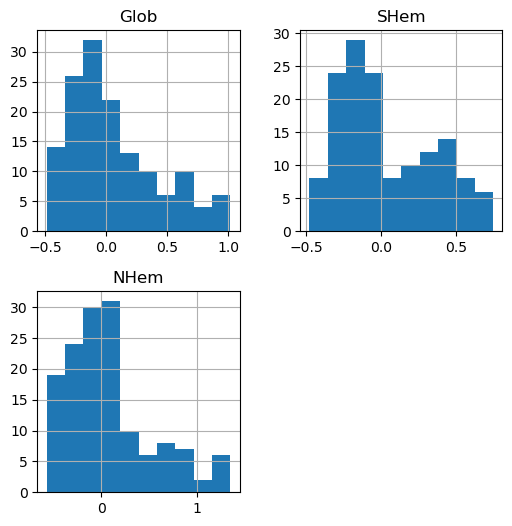

In [178]:
dat[['Glob', 'SHem', 'NHem']].hist();

(pandas-line-plots)=
### Line plots (`pandas`)

The `.plot` method, given a `Series` (or a `DataFrame` with one column), creates a line plot with the indices on the x-axis and the values on the y-axis:

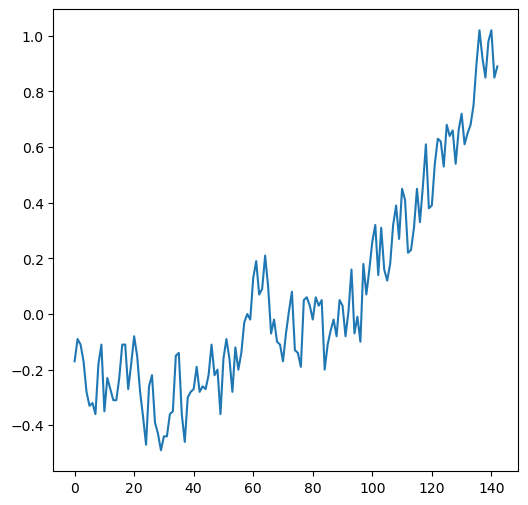

In [179]:
dat['Glob'].plot();

In case we need to change the values on the x-axis, the simplest way is to set the required values as the index (see {ref}`modifying-index`). For example, here we set the `'Year'` column as the `DataFrame` index, then plot the `'Glob'` column. As a result, the measurement *year* appears on the x-axis instead of the default consecutive index:

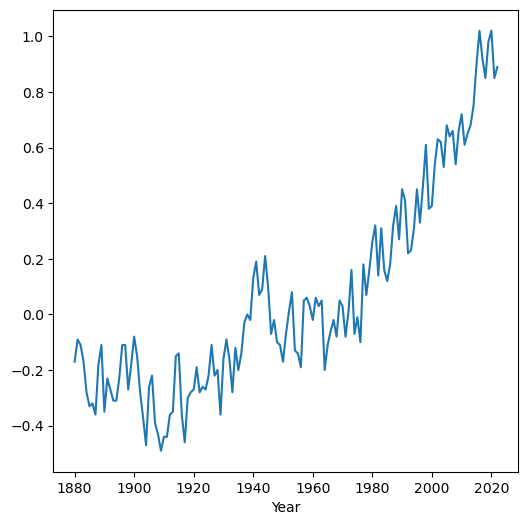

In [180]:
dat.set_index('Year')['Glob'].plot();

Pay attention to the order of operations (from left to right) in the above expression:

* `dat.set_index('Year')`—Setting the index
* `['Glob']`—Extracting a column (as `Series`)
* `.plot();`—Plotting

When we plot a `DataFrame` with more than one column, the columns are plotted as sepatate *series* in the same line plot. This is useful to compare the values in different columns. Fore example, plotting the `'Glob'`, `'NHem'`, and `'SHem'` columns demonstrates that in recent years Northern Hemisphere (`'NHem'`) temperatures have been relatively higher, while Southern Hemisphere (`'SHem'`) temperatures have been relatively lower, compared to the global average (`'Glob'`):

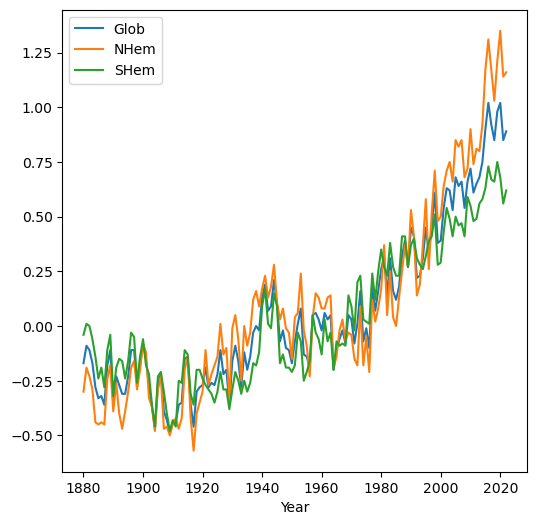

In [181]:
dat.set_index('Year')[['Glob', 'NHem', 'SHem']].plot();

(scatterplots)=
### Scatterplots (`pandas`)

One more useful type of plot is a *scatterplot*, where we display the association between two series in the form of scattered points. To produce a scatterplot, we use the `.plot.scatter` method of a `DataFrame`, specifying the names of the columns to be displayed in the x-axis (`x`) and y-axis (`y`).

For example, the following expression shows the relation between the values in the `'NHem'` and `'SHem'` columns of `dat`:

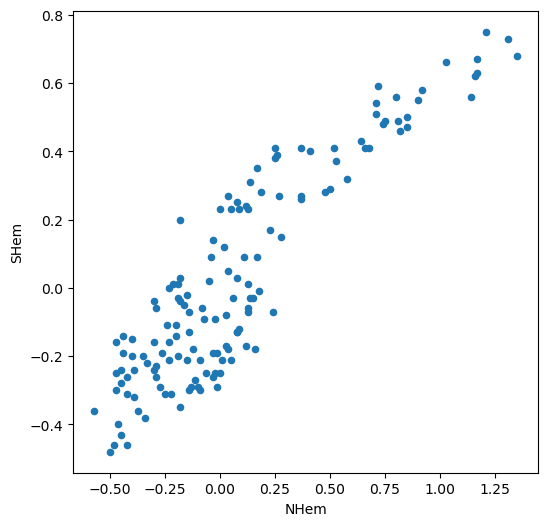

In [182]:
dat.plot.scatter(x='NHem', y='SHem');

We clearly see that there is a strong positive association between Northern Hemisphere and Southern Hemisphere temperatures across years. Namely, in years when the Nothern Hemisphere temperature is high, the Southern Hemisphere temperature also tends to be high, and vice versa.

(pandas-operators)=
## Operators

(operators-on-series)=
### Operators on `Series`

Operators and summary functions can be applied to `Series` objects, similarly to the way they can be applied to `numpy` arrays (see {ref}`numpy-vectorized-ops` and {ref}`summarizing-array-values`, respectively). For example, summary methods such as `.min`, `.max`, and `.mean` can be applied on a `Series` to summarize its respective properties. Here is how we can find out the start and end `'Year'` in `dat`:

In [183]:
dat['Year'].min()

1880

In [184]:
dat['Year'].max()

2022

and the average `'Glob'` value:

In [185]:
dat['Glob'].mean()

0.06034965034965038

We can also combine `Series` with individual values, or combine two series, to apply pairwise arithmetic or boolean operators. For example, here is how we can subtract `1` from all `'Year'` values:

In [186]:
dat['Year'] - 1

0      1879
1      1880
2      1881
3      1882
4      1883
       ... 
138    2017
139    2018
140    2019
141    2020
142    2021
Name: Year, Length: 143, dtype: int64

and here is how we can calculate the yearly differences between the Northern Hemisphere and Southern Hemisphere temperature anomalies:

In [187]:
dat['NHem'] - dat['SHem']

0     -0.26
1     -0.20
2     -0.23
3     -0.23
4     -0.30
       ... 
138    0.37
139    0.46
140    0.67
141    0.58
142    0.54
Length: 143, dtype: float64

Note that this is an arithmetic operation between two `Series`, which returns a new series.

```{note}
When performing operations between pairs of `Series` or `DataFrame`s, `pandas` aligns the elements according to the *index*, rather than the position. When the data come from the same table (such as in the last example), the indices are guaranteed to match. However, when the data come from *different* tables, you must make sure their indices match.
```

### Operators on `DataFrame`s

Operating on an entire `DataFrame` is more complex than operating on a `Series` (see {ref}`operators-on-series`). Accordingly, operators behave in different ways. For example, arithmetic and boolean operations combined with an individual value are applied per-element, resulting in a new `DataFrame` (assuming that all columns are numeric):

In [188]:
dat - 10

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1870,-10.17,-10.30,-10.04,-10.39,...,-10.15,-10.09,-10.03,-9.95,-9.33
1,1871,-10.09,-10.19,-9.99,-10.37,...,-9.90,-9.88,-10.04,-10.07,-9.41
2,1872,-10.11,-10.23,-10.00,-10.33,...,-10.05,-10.04,-9.98,-9.96,-9.38
3,1873,-10.17,-10.29,-10.06,-10.36,...,-10.17,-10.14,-10.03,-9.93,-9.50
4,1874,-10.28,-10.44,-10.14,-10.62,...,-10.12,-10.16,-10.18,-10.02,-9.35
...,...,...,...,...,...,...,...,...,...,...,...
138,2008,-9.15,-8.97,-9.34,-8.76,...,-9.27,-9.37,-9.20,-9.63,-9.04
139,2009,-9.02,-8.79,-9.25,-8.58,...,-9.10,-9.11,-9.25,-9.61,-9.15
140,2010,-8.98,-8.65,-9.32,-8.33,...,-9.12,-9.16,-9.42,-9.61,-9.09
141,2011,-9.15,-8.86,-9.44,-8.58,...,-9.28,-9.41,-9.28,-9.68,-9.69


Methods such as `.mean`, however, are by default applied per column (i.e., `axis=0`):

In [189]:
dat.mean()

Year       1951.000000
Glob          0.060350
NHem          0.088112
SHem          0.032937
24N-90N       0.109231
              ...     
EQU-24N       0.059161
24S-EQU       0.080140
44S-24S       0.044126
64S-44S      -0.056783
90S-64S      -0.080769
Length: 15, dtype: float64

We elaborate on this type of row- and column-wise operations later on (see {ref}`pandas-row-col-wise-operations`).

(pandas-creating-new-columns)=
## Creating new columns

New `DataFrame` columns can be created by assignment of a `Series` to a non-existing column index. For example, the following expression calculates a `Series` of yearly differences between the Northern Hemisphere and Southern Hemisphere temperatures, as shown above, and assigns it to a *new* column named `diff`:

In [190]:
dat['diff'] = dat['NHem'] - dat['SHem']
dat

,Year,Glob,NHem,SHem,24N-90N,...,24S-EQU,44S-24S,64S-44S,90S-64S,diff
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.09,-0.03,0.05,0.67,-0.26
1,1881,-0.09,-0.19,0.01,-0.37,...,0.12,-0.04,-0.07,0.59,-0.20
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.04,0.02,0.04,0.62,-0.23
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.14,-0.03,0.07,0.50,-0.23
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.16,-0.18,-0.02,0.65,-0.30
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.63,0.80,0.37,0.96,0.37
139,2019,0.98,1.21,0.75,1.42,...,0.89,0.75,0.39,0.85,0.46
140,2020,1.02,1.35,0.68,1.67,...,0.84,0.58,0.39,0.91,0.67
141,2021,0.85,1.14,0.56,1.42,...,0.59,0.72,0.32,0.31,0.58


Here is a plot ({ref}`pandas-line-plots`) of the differences we just calulated, as function of time:

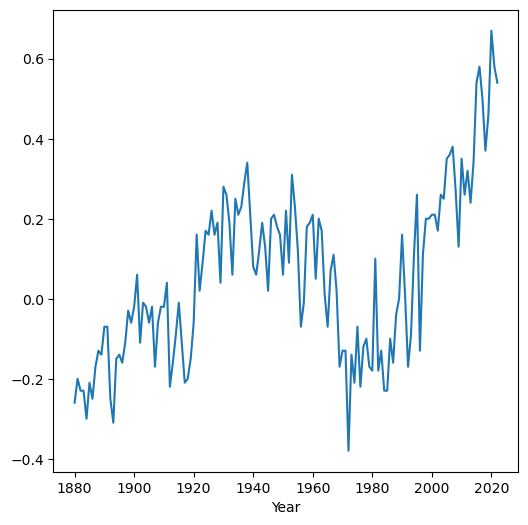

In [191]:
dat.set_index('Year')['diff'].plot();

We can also assign an expression that combines series with individual values:

In [192]:
dat['NHem2'] = dat['NHem'] * 2
dat

,Year,Glob,NHem,SHem,24N-90N,...,44S-24S,64S-44S,90S-64S,diff,NHem2
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.03,0.05,0.67,-0.26,-0.60
1,1881,-0.09,-0.19,0.01,-0.37,...,-0.04,-0.07,0.59,-0.20,-0.38
2,1882,-0.11,-0.23,0.00,-0.33,...,0.02,0.04,0.62,-0.23,-0.46
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.03,0.07,0.50,-0.23,-0.58
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.18,-0.02,0.65,-0.30,-0.88
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.80,0.37,0.96,0.37,2.06
139,2019,0.98,1.21,0.75,1.42,...,0.75,0.39,0.85,0.46,2.42
140,2020,1.02,1.35,0.68,1.67,...,0.58,0.39,0.91,0.67,2.70
141,2021,0.85,1.14,0.56,1.42,...,0.72,0.32,0.31,0.58,2.28


or an individual value on its own (in which case it is duplicated across all rows):

In [193]:
dat['variable'] = 'temperature'
dat

,Year,Glob,NHem,SHem,24N-90N,...,64S-44S,90S-64S,diff,NHem2,variable
0,1880,-0.17,-0.30,-0.04,-0.39,...,0.05,0.67,-0.26,-0.60,temperature
1,1881,-0.09,-0.19,0.01,-0.37,...,-0.07,0.59,-0.20,-0.38,temperature
2,1882,-0.11,-0.23,0.00,-0.33,...,0.04,0.62,-0.23,-0.46,temperature
3,1883,-0.17,-0.29,-0.06,-0.36,...,0.07,0.50,-0.23,-0.58,temperature
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.02,0.65,-0.30,-0.88,temperature
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.37,0.96,0.37,2.06,temperature
139,2019,0.98,1.21,0.75,1.42,...,0.39,0.85,0.46,2.42,temperature
140,2020,1.02,1.35,0.68,1.67,...,0.39,0.91,0.67,2.70,temperature
141,2021,0.85,1.14,0.56,1.42,...,0.32,0.31,0.58,2.28,temperature


Let us delete the `'diff'`, `'NHem2'`, `'variable'` columns we just created to get the original version of `dat`:

In [194]:
dat = dat.drop(['diff', 'NHem2', 'variable'], axis=1)
dat

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67
1,1881,-0.09,-0.19,0.01,-0.37,...,0.10,0.12,-0.04,-0.07,0.59
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.05,-0.04,0.02,0.04,0.62
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.17,-0.14,-0.03,0.07,0.50
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.12,-0.16,-0.18,-0.02,0.65
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
141,2021,0.85,1.14,0.56,1.42,...,0.72,0.59,0.72,0.32,0.31


(dataframe-filtering)=
## `DataFrame` filtering

(pandas-filtering-conditinal)=
### Using conditional operators

Most often, instead of selecting rows by index or by position (see {ref}`dataframe-selecting-rows`), we want to *filter* rows by a condition that we apply on table values. For example, suppose that we want to get a subset of `dat` with all rows after the year `2017`. To do that, we can create a boolean `Series`, specifying which rows are to be retained:

In [195]:
sel = dat['Year'] > 2017
sel

0      False
1      False
2      False
3      False
4      False
       ...  
138     True
139     True
140     True
141     True
142     True
Name: Year, Length: 143, dtype: bool

Then, the boolean series can be passed as an *index* inside square brackets (`[`), to select those rows corresponding to `True`:

In [196]:
dat[sel]

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
138,2018,0.85,1.03,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
141,2021,0.85,1.14,0.56,1.42,...,0.72,0.59,0.72,0.32,0.31
142,2022,0.89,1.16,0.62,1.52,...,0.63,0.51,0.79,0.39,1.11


The same can be acheived in a single step, *without* storing the `Series` in a variable such as `sel`, as follows:

In [197]:
dat[dat['Year'] > 2017]

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
138,2018,0.85,1.03,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
141,2021,0.85,1.14,0.56,1.42,...,0.72,0.59,0.72,0.32,0.31
142,2022,0.89,1.16,0.62,1.52,...,0.63,0.51,0.79,0.39,1.11


Here is an example with a more complex condition (note the parantheses!):

In [244]:
dat[(dat['Year'] > 2017) & (dat['Year'] <= 2020)]

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
138,2018,0.85,1.03,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91


```{admonition} Exercise 05-e
:class: important
* Create a subset of `dat` with all rows where the global temperature anomaly (`'Glob'`) was above `1` degree.
```

(pandas-using-isin)=
### Using `.isin`

Sometimes, the condition we are interested in is not a comparison against an individual value (such as `>2017`, see {ref}`pandas-filtering-conditinal`), but multiple values. For example, suppose we want to extract the rows corresponding to the years `2008`, `2012`, and `2016`, in `dat`. One way is to compose a combined condition using `|`, using the `numpy` syntax we are familiar with (see {ref}`numpy-conditional-operators`). Again, recall that we must enclose each internal expression in breackets `(` so that it is evaluated before `|`:

In [198]:
sel = (dat['Year'] == 2008) | (dat['Year'] == 2012) | (dat['Year'] == 2016)
dat[sel]

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
128,2008,0.54,0.68,0.41,0.91,...,0.33,0.42,0.53,0.09,0.60
132,2012,0.65,0.81,0.49,1.04,...,0.48,0.58,0.56,0.19,0.43
136,2016,1.02,1.31,0.73,1.54,...,0.96,1.07,0.67,0.26,0.40


As you can imagine, this method quickly becomes unfeasible if the number of items becomes large. Instead, we can use the `.isin` method, combined with a `list` of items to compare with the `Series` values:

In [199]:
sel = dat['Year'].isin([2008, 2012, 2016])
dat[sel]

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
128,2008,0.54,0.68,0.41,0.91,...,0.33,0.42,0.53,0.09,0.60
132,2012,0.65,0.81,0.49,1.04,...,0.48,0.58,0.56,0.19,0.43
136,2016,1.02,1.31,0.73,1.54,...,0.96,1.07,0.67,0.26,0.40


Recall the `in` operator which we learned about earlier (see {ref}`the-in-operator`). The `in` operator is analogous to the `.isin` method, but intended for lists.

```{admonition} Exercise 05-f
:class: important
* What do you think is the meaning of `dat[~sel]`? Try it to check your answer.
```

### Assignment to subsets

When assigning to subsets of a column, we need to use the `.loc` method. Typically we combine:

* A boolean `Series` in the *rows* index, to select the observations we want to modify
* A single `string` in the *columns* index, to select the variable we want to modify

For example, the following expression sets the `'NHem'` column value to `12.3` in all years after 2017:

In [200]:
dat.loc[dat['Year'] > 2017, 'NHem'] = 999
dat

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67
1,1881,-0.09,-0.19,0.01,-0.37,...,0.10,0.12,-0.04,-0.07,0.59
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.05,-0.04,0.02,0.04,0.62
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.17,-0.14,-0.03,0.07,0.50
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.12,-0.16,-0.18,-0.02,0.65
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,999.00,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,999.00,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,999.00,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
141,2021,0.85,999.00,0.56,1.42,...,0.72,0.59,0.72,0.32,0.31


To get back to the original values, let us read the CSV file once again:

In [201]:
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')
dat

,Year,Glob,NHem,SHem,24N-90N,...,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.04,-0.39,...,-0.15,-0.09,-0.03,0.05,0.67
1,1881,-0.09,-0.19,0.01,-0.37,...,0.10,0.12,-0.04,-0.07,0.59
2,1882,-0.11,-0.23,0.00,-0.33,...,-0.05,-0.04,0.02,0.04,0.62
3,1883,-0.17,-0.29,-0.06,-0.36,...,-0.17,-0.14,-0.03,0.07,0.50
4,1884,-0.28,-0.44,-0.14,-0.62,...,-0.12,-0.16,-0.18,-0.02,0.65
...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.85,1.03,0.66,1.24,...,0.73,0.63,0.80,0.37,0.96
139,2019,0.98,1.21,0.75,1.42,...,0.90,0.89,0.75,0.39,0.85
140,2020,1.02,1.35,0.68,1.67,...,0.88,0.84,0.58,0.39,0.91
141,2021,0.85,1.14,0.56,1.42,...,0.72,0.59,0.72,0.32,0.31


(pandas-missing-data)=
## Working with missing data (`pandas`)

### Missing data in `pandas`

Missing values, denoting that the true value is unknown, are an inevitable feature of real-world data. In plain-text formats, such as CSV, missing values are commonly just "missing", i.e., left blank, or marked with a labels such as the text `'NA'`. 

Treatment of "No Data" values in `Series` and `DataFrame`s is derived from the underlying behavior in `numpy` ({ref}`numpy-nodata`), as `pandas` is based on `numpy`. Namely, "No Data" values are typically represented using `np.nan`.

`pandas` may automatically transform the `Series` data type, and "No Data" representation, for optimized data storage. For example, a `Series` of type `int` which contains one or more `np.nan` value, is automatically transformed to `float`, similarly to the behaviour we have seen with `numpy` array ({ref}`numpy-nodata`):

In [202]:
pd.Series([7, 4, 3])

0    7
1    4
2    3
dtype: int64

In [203]:
pd.Series([7, np.nan, 3])

0    7.0
1    NaN
2    3.0
dtype: float64

Moreover, `None` values are automatically transformed to `np.nan` (unlike `numpy`, where `None` values are preserved, resulting in an `object` array):

In [204]:
pd.Series([7, None, 3])

0    7.0
1    NaN
2    3.0
dtype: float64

"No Data" values are automatically assigned where necessary when creating a `Series` or a `DataFrame` through other methods too. For example, empty cells in a CSV file are assigned with `np.nan` when importing the CSV into a `DataFrame` (see {ref}`pandas-reading-from-file`). 

The `trees.csv` file contains the locations, and other details, about trees in Beer-Sheva: 

* `'plate_num'`---The tree ID
* `'tree_speci'`---The tree species
* `'street_nam'`, `'neighborho'`---Street and neighborhood name, respectively
* `'itm_x'`, `'itm_y'`---x- and y-coordinates in ITM, respectively 
* `'lon'`, `'lat'`---longitude and latitude, respectively 

If you open the CSV file in a spreadsheet program (such as Excel), you will see that some of the cells are empty. Those cells are assigned with `np.nan` when importing the table:

In [205]:
trees = pd.read_csv('data/trees.csv')
trees

,plate_num,tree_speci,street_nam,neighborho,itm_x,itm_y,lat,lon
0,0,NaN,NaN,NaN,178851.0986,573942.6775,31.256378,34.778136
1,0,NaN,קדושי יאסי,NaN,177190.9032,575006.8485,31.265916,34.760662
2,0,NaN,טוביהו דוד,NaN,177262.2382,573712.8533,31.254248,34.761465
3,0,NaN,NaN,NaN,180647.9995,576674.5454,31.281077,34.796895
4,0,NaN,NaN,NaN,178965.5725,571592.4473,31.235185,34.779433
...,...,...,...,...,...,...,...,...
59566,0,NaN,"אצ""ל",NaN,177777.1526,574971.2819,31.265617,34.766818
59567,0,NaN,NaN,NaN,178736.2796,573397.7334,31.251459,34.776953
59568,0,NaN,NaN,NaN,178960.3601,570520.2996,31.225515,34.779421
59569,794,סיגלון עלי מימוסה,אלישר חיים משה,רמות,182565.0560,575781.1640,31.273082,34.817059


First, let's make the column names more convenient:

In [206]:
trees = trees.rename(columns={
    'plate_num': 'id', 
    'tree_speci': 'species', 
    'street_nam': 'street', 
    'neighborho': 'neighborhood'
})
trees

,id,species,street,neighborhood,itm_x,itm_y,lat,lon
0,0,NaN,NaN,NaN,178851.0986,573942.6775,31.256378,34.778136
1,0,NaN,קדושי יאסי,NaN,177190.9032,575006.8485,31.265916,34.760662
2,0,NaN,טוביהו דוד,NaN,177262.2382,573712.8533,31.254248,34.761465
3,0,NaN,NaN,NaN,180647.9995,576674.5454,31.281077,34.796895
4,0,NaN,NaN,NaN,178965.5725,571592.4473,31.235185,34.779433
...,...,...,...,...,...,...,...,...
59566,0,NaN,"אצ""ל",NaN,177777.1526,574971.2819,31.265617,34.766818
59567,0,NaN,NaN,NaN,178736.2796,573397.7334,31.251459,34.776953
59568,0,NaN,NaN,NaN,178960.3601,570520.2996,31.225515,34.779421
59569,794,סיגלון עלי מימוסה,אלישר חיים משה,רמות,182565.0560,575781.1640,31.273082,34.817059


For example, species of the first tree is unknown:

In [207]:
trees['species'].iloc[0]

nan

### Detecting with `pd.isna`

To detect "No Data" values, the `.isna` method (or `pd.isna` function) can be applied on a `Series` or a `DataFrame`. The result is a boolean mask that marks the missing values. The `pd.isna` function from `pandas` is analogous to the `np.isnan` function for arrays, which we learned about earlier (see {ref}`numpy-detecting-nodata`).

For example, `trees.isna()` returns a boolean `DataFrame`, of the same shape as `trees`, with `True` marking "No Data" values:

In [208]:
trees.isna()

,id,species,street,neighborhood,itm_x,itm_y,lat,lon
0,False,True,True,True,False,False,False,False
1,False,True,False,True,False,False,False,False
2,False,True,False,True,False,False,False,False
3,False,True,True,True,False,False,False,False
4,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...
59566,False,True,False,True,False,False,False,False
59567,False,True,True,True,False,False,False,False
59568,False,True,True,True,False,False,False,False
59569,False,False,False,False,False,False,False,False


Similarly, the `.isna()` method applied on a `Series` returns a new boolean `Series` where "No Data" values are marked with `True`:

In [209]:
trees['species'].isna()

0         True
1         True
2         True
3         True
4         True
         ...  
59566     True
59567     True
59568     True
59569    False
59570     True
Name: species, Length: 59571, dtype: bool

The `~` operator (see {ref}`numpy-conditional-operators`) reverses a boolean `Series`. This is very useful in the context of "No Data" masks, since it can reverse the mask so that it points at *non*-missing values.

For example, here is how we can get the reverse of `trees.isna()`:

In [210]:
~trees.isna()

,id,species,street,neighborhood,itm_x,itm_y,lat,lon
0,True,False,False,False,True,True,True,True
1,True,False,True,False,True,True,True,True
2,True,False,True,False,True,True,True,True
3,True,False,False,False,True,True,True,True
4,True,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...
59566,True,False,True,False,True,True,True,True
59567,True,False,False,False,True,True,True,True
59568,True,False,False,False,True,True,True,True
59569,True,True,True,True,True,True,True,True


and here is how we can get the reverse of `trees['spedies'].isna()`:

In [211]:
~trees['species'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
59566    False
59567    False
59568    False
59569     True
59570    False
Name: species, Length: 59571, dtype: bool

Another possible use of `~` and `.isna` is to extract the non-missing values from a series. Here is an example:

In [212]:
trees['species'][~trees['species'].isna()]

16                אשל הפרקים
24         סיגלון עלה מימוזה
26                זית אירופי
31                מילה סורית
38            מילה פנסילבנית
                ...         
59552         מילה פנסילבנית
59554    מילה ירוקת עד אובלי
59557         בוהיניה מגוונת
59558          מילה ירוקת עד
59569      סיגלון עלי מימוסה
Name: species, Length: 14866, dtype: object

However, there is a dedicated method called `.dropna` to do that with shorter code (see {ref}`removing-with-dropna`):

In [213]:
trees['species'].dropna()

16                אשל הפרקים
24         סיגלון עלה מימוזה
26                זית אירופי
31                מילה סורית
38            מילה פנסילבנית
                ...         
59552         מילה פנסילבנית
59554    מילה ירוקת עד אובלי
59557         בוהיניה מגוונת
59558          מילה ירוקת עד
59569      סיגלון עלי מימוסה
Name: species, Length: 14866, dtype: object

Similarly, we can extract `DataFrame` rows where a particular column is non-missing. For example, here we have those `trees` rows that have a non-missing `'species'` value:

In [214]:
trees[~trees['species'].isna()]

,id,species,street,neighborhood,itm_x,itm_y,lat,lon
16,3781,אשל הפרקים,אבן עזרא אברהם,שכונה ד,179643.7211,575520.3612,31.270634,34.786395
24,11181,סיגלון עלה מימוזה,מאיר גרוסמן,נווה זאב,177779.1452,571815.6028,31.237156,34.766971
26,9863,זית אירופי,יהודה אלחריזי,נאות לון,177533.4705,573428.4568,31.251693,34.764324
31,1722,מילה סורית,שריג נחום,רמות הרכס,181497.2680,576827.3730,31.282484,34.805808
38,16510,מילה פנסילבנית,NaN,שכונה א,179617.3045,572772.0315,31.245846,34.786227
...,...,...,...,...,...,...,...,...
59552,16542,מילה פנסילבנית,NaN,שכונה א,179430.3376,572819.7487,31.246270,34.784262
59554,7501,מילה ירוקת עד אובלי,אברהם אבינו,שכונה ד,180421.5505,575430.0755,31.269846,34.794565
59557,11225,בוהיניה מגוונת,מישאל דהאן,נווה זאב,177619.4177,571312.0208,31.232608,34.765315
59558,9324,מילה ירוקת עד,אילן רמון,נאות לון,176737.6179,573644.9874,31.253617,34.755960


```{note} 
Instead of reversing the output of `pd.isna` with the `~operator`, another option is to use the inverse method `.notna`, which returns the *non-missing* mask.
```

Finally, it is often useful to combine the `.isna` method with `.any` to find out if a `Series` contains at least one missing value:

In [215]:
trees['species'].isna().any()

True

In [216]:
trees['id'].isna().any()

False

or to find out which columns contain at least one missing value:

In [217]:
trees.isna().any()

id              False
species          True
street           True
neighborhood     True
itm_x           False
itm_y           False
lat             False
lon             False
dtype: bool

We can also use `.sum` to find out how many missing value are there in each column:

In [218]:
trees.isna().sum()

id                  0
species         44705
street          31678
neighborhood    42121
itm_x               0
itm_y               0
lat                 0
lon                 0
dtype: int64

or `.mean` to find the *proportion* of missing values in each column:

In [219]:
trees.isna().mean()

id              0.000000
species         0.750449
street          0.531769
neighborhood    0.707072
itm_x           0.000000
itm_y           0.000000
lat             0.000000
lon             0.000000
dtype: float64

(pandas-operations-with-missing-data)=
### Operators with missing values

When applying a method such as `.sum`, `.mean`, `.min`, or `.max` (or the respective `np.*` function) on a `Series`, the "No Data" values are ignored. That is, the result is based only on the non-missing values. For example:

In [220]:
trees.loc[trees['species'] == 'סיגלון עלי מימוסה', 'sigalon'] = 1
trees

,id,species,street,neighborhood,itm_x,itm_y,lat,lon,sigalon
0,0,NaN,NaN,NaN,178851.0986,573942.6775,31.256378,34.778136,NaN
1,0,NaN,קדושי יאסי,NaN,177190.9032,575006.8485,31.265916,34.760662,NaN
2,0,NaN,טוביהו דוד,NaN,177262.2382,573712.8533,31.254248,34.761465,NaN
3,0,NaN,NaN,NaN,180647.9995,576674.5454,31.281077,34.796895,NaN
4,0,NaN,NaN,NaN,178965.5725,571592.4473,31.235185,34.779433,NaN
...,...,...,...,...,...,...,...,...,...
59566,0,NaN,"אצ""ל",NaN,177777.1526,574971.2819,31.265617,34.766818,NaN
59567,0,NaN,NaN,NaN,178736.2796,573397.7334,31.251459,34.776953,NaN
59568,0,NaN,NaN,NaN,178960.3601,570520.2996,31.225515,34.779421,NaN
59569,794,סיגלון עלי מימוסה,אלישר חיים משה,רמות,182565.0560,575781.1640,31.273082,34.817059,1.0


In [221]:
trees['sigalon'].sum()

2055.0

Note that this behavior is specific to `pandas`, and unlike what we have seen with `numpy` arrays, where these opertions return "No Data" if at least one of the values in the array is "No Data" (see {ref}`numpy-operations-with-nodata`):

In [222]:
trees['sigalon'].to_numpy().sum()

nan

Element-by-element operations, however, expectedly result in "No Data" when applied to "No Data" elements, since the result cannot be computed at all. For example:

In [223]:
trees['sigalon'] * 2

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
59566    NaN
59567    NaN
59568    NaN
59569    2.0
59570    NaN
Name: sigalon, Length: 59571, dtype: float64

(removing-with-dropna)=
### Removing with `.dropna`

The `.dropna` method can be used to remove missing values from a `DataFrame` (or a `Series`). The default is to drop all rows that have at least one missing value, i.e., keeping only *complete observations*. For example:

In [224]:
trees.dropna()

,id,species,street,neighborhood,itm_x,itm_y,lat,lon,sigalon
46,147,סיגלון עלי מימוסה,אורי צבי,רמות,182514.8560,576183.1820,31.276706,34.816517,1.0
94,6879,סיגלון עלי מימוסה,פינקל שמעון,נווה מנחם,176749.0495,574848.2124,31.264469,34.756029,1.0
101,8590,סיגלון עלי מימוסה,דרך אילת,מרכז אזרחי,180686.9014,572493.2768,31.243368,34.797465,1.0
109,750,סיגלון עלי מימוסה,אלישר חיים משה,רמות,182639.7940,575771.6170,31.272998,34.817845,1.0
118,1697,סיגלון עלי מימוסה,האוזנר גדעון,רמות הרכס,181421.0310,577302.3120,31.286765,34.804989,1.0
...,...,...,...,...,...,...,...,...,...
59497,6881,סיגלון עלי מימוסה,פינקל שמעון,נווה מנחם,176769.5141,574839.2052,31.264389,34.756244,1.0
59512,1702,סיגלון עלי מימוסה,האוזנר גדעון,רמות הרכס,181449.1440,577213.9830,31.285969,34.805287,1.0
59529,217,סיגלון עלי מימוסה,הר בוקר,רמות,181888.6660,575877.2040,31.273927,34.809953,1.0
59538,417,סיגלון עלי מימוסה,אמיר אברהם,רמות,183246.8270,576113.8890,31.276104,34.824206,1.0


```{note}
There are other parameters of `.dropna` for dropping columns instead of rows, or dropping rows or column using a threshold of "acceptable" minimum number of non-missing values. See the documentation for details: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html>.
```

### Replacing with `.fillna`

Missing values can be replaced using the `.fillna` method. The parameter specifies which new value should be placed instead of the "No Data" values. For example, here is how we can replace the "No Data" values in the `'sigalon'` column of `trees` with `0`:

In [226]:
trees['sigalon'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59566    0.0
59567    0.0
59568    0.0
59569    1.0
59570    0.0
Name: sigalon, Length: 59571, dtype: float64

or assign the result back to the `trees` table:

In [227]:
trees['sigalon'] = trees['sigalon'].fillna(0)
trees

,id,species,street,neighborhood,itm_x,itm_y,lat,lon,sigalon
0,0,NaN,NaN,NaN,178851.0986,573942.6775,31.256378,34.778136,0.0
1,0,NaN,קדושי יאסי,NaN,177190.9032,575006.8485,31.265916,34.760662,0.0
2,0,NaN,טוביהו דוד,NaN,177262.2382,573712.8533,31.254248,34.761465,0.0
3,0,NaN,NaN,NaN,180647.9995,576674.5454,31.281077,34.796895,0.0
4,0,NaN,NaN,NaN,178965.5725,571592.4473,31.235185,34.779433,0.0
...,...,...,...,...,...,...,...,...,...
59566,0,NaN,"אצ""ל",NaN,177777.1526,574971.2819,31.265617,34.766818,0.0
59567,0,NaN,NaN,NaN,178736.2796,573397.7334,31.251459,34.776953,0.0
59568,0,NaN,NaN,NaN,178960.3601,570520.2996,31.225515,34.779421,0.0
59569,794,סיגלון עלי מימוסה,אלישר חיים משה,רמות,182565.0560,575781.1640,31.273082,34.817059,1.0


Let us return to the original `trees` table:

In [229]:
trees = pd.read_csv('data/trees.csv')
trees

,plate_num,tree_speci,street_nam,neighborho,itm_x,itm_y,lat,lon
0,0,NaN,NaN,NaN,178851.0986,573942.6775,31.256378,34.778136
1,0,NaN,קדושי יאסי,NaN,177190.9032,575006.8485,31.265916,34.760662
2,0,NaN,טוביהו דוד,NaN,177262.2382,573712.8533,31.254248,34.761465
3,0,NaN,NaN,NaN,180647.9995,576674.5454,31.281077,34.796895
4,0,NaN,NaN,NaN,178965.5725,571592.4473,31.235185,34.779433
...,...,...,...,...,...,...,...,...
59566,0,NaN,"אצ""ל",NaN,177777.1526,574971.2819,31.265617,34.766818
59567,0,NaN,NaN,NaN,178736.2796,573397.7334,31.251459,34.776953
59568,0,NaN,NaN,NaN,178960.3601,570520.2996,31.225515,34.779421
59569,794,סיגלון עלי מימוסה,אלישר חיים משה,רמות,182565.0560,575781.1640,31.273082,34.817059


## Copies

One more thing we need to be aware when working with `pandas` is the distinction between references and copies. The `pandas` package (and `geopandas` which extends it, see {ref}`geopandas1`) behaves similarly to `numpy` with respect to copies (see {ref}`numpy-references-and-copies`). We must be aware of whether we are creating a view or a copy of a `DataFrame`, to avoid unexpected results.

Here is a small demonstration, very similar to the one we did with `numpy` arrays (see {ref}`numpy-references-and-copies`). Suppose that we create a copy of `dat`, named `dat2`:

In [110]:
dat2 = dat

Next, we modify `dat2`, assigning a new value such as `9999` into a particular cell (e.g., 2<sup>nd</sup> row, 2<sup>nd</sup> column):

In [111]:
dat2.iloc[1, 1] = 9999

The printout of the table top-left "corner" demonstrates the value was actually changed:

In [112]:
dat2.iloc[:4, :4]

,Year,Glob,NHem,SHem
0,1880,-0.16,-0.29,-0.04
1,1881,9999.00,-0.17,0.01
2,1882,-0.11,-0.21,0.00
3,1883,-0.17,-0.28,-0.06


What may be surprising, again, is that the original table `dat` has also changed. We thus demonstrated that `dat2` is a reference to `dat`, rather than an independent copy: 

In [113]:
dat.iloc[:4, :4]

,Year,Glob,NHem,SHem
0,1880,-0.16,-0.29,-0.04
1,1881,9999.00,-0.17,0.01
2,1882,-0.11,-0.21,0.00
3,1883,-0.17,-0.28,-0.06


To create an independent copy, so that its modifications are not reflected in the original, we need to explicitly use the `.copy` method, as in:

In [114]:
dat2 = dat.copy()

Let us read the CSV file again to get back to the original values:

In [115]:
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')

(pandas-writing)=
## Writing to file

A `DataFrame` can be exported to several formats, such as CSV or Excel, using the appropriate method. For example, exporting to CSV is done using the `.to_csv` method.

Here is how we can export the `DataFrame` named `stations`, which we created in the beginning of the chapter (see {ref}`creating-dataframe`), to a CSV file named `stations.csv` in the `output` directory. The additional `index=False` argument specifies that we do not want to export the index values, which is usually the case:

In [116]:
stations.to_csv('output/stations.csv', index=False)

Note that the file is exported to a sub-directory named `output` (which must already exist!).

The way the resulting file `stations.csv` is displayed in a spreadsheet program, such as Microsoft Excel or LibreOffice Calc, is shown in {numref}`exported-csv`. 

```{figure} images/exported_csv.png
---
name: exported-csv
---
The `DataFrame` named `stations` when exported to CSV file and opened in LibreOffice Calc 
```

(exercise-pandas1)=
## More exercises

```{admonition} Exercise 05-g
:class: important
* Import the file `trees.csv` into a `DataFrame`. 
* How many observations with non-missing `'species'` are there? (answer: `14866`)
* How many observations with non-missing `'street'` **and** non-missing `'neighborhood'` are there? (answer: `12450`)
* How many unique species names are there (excluding `np.nan`)? (answer: `130`)

## Exercise solutions

In [117]:
from myst_nb import glue

### Exercise 05-d

In [119]:
import pandas as pd
dat = pd.read_csv('data/ZonAnn.Ts+dSST.csv')
dat['Year'].iloc[dat.shape[0]-1]

2021

### Exercise 05-g

In [1]:
import pandas as pd
trees = pd.read_csv('data/trees.csv')
trees = trees.rename(columns={
    'plate_num': 'id', 
    'tree_speci': 'species', 
    'street_nam': 'street', 
    'neighborho': 'neighborhood'
})
trees['species'].notna().sum()

14866

In [241]:
(trees['street'].notna() & trees['neighborhood'].notna()).sum()

12450

In [253]:
trees['species'].nunique()

130